<a href="https://colab.research.google.com/github/disenodc/MachineLearning_UNS/blob/main/TP4_Fake_News.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TP 4 FAKE NEWS


In [3]:
#importo librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

import warnings
warnings.filterwarnings('ignore')

In [4]:
true_news = pd.read_csv("https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectFN/data/true.csv")
true_news.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [2]:
fake_news = pd.read_csv("https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectFN/data/fake.csv")
fake_news.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [5]:
fake_news['fake'] = 1
true_news['fake'] = 0

In [6]:
true_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
 4   fake     21417 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 836.7+ KB


In [7]:
# Unir fake and true news
df_news = pd.concat([fake_news, true_news])

In [8]:
df_news.sample(5)

,title,text,subject,date,fake
10683,Clinton picks up endorsement from Senate Minor...,WASHINGTON (Reuters) - Top Senate Democrat Har...,politicsNews,"February 24, 2016",0
3136,Republicans debating remedies for corporate ta...,WASHINGTON (Reuters) - President Donald Trump ...,politicsNews,"June 18, 2017",0
18607,Catalan leader casts vote in banned independen...,MADRID (Reuters) - Catalan leader Carles Puigd...,worldnews,"October 1, 2017",0
238,Corker Has Last Word On Day Care Donnie: ‘On ...,Tennessee Republican Senator Bob Corker announ...,News,"October 9, 2017",1
12160,INSANITY! HARRY REID CLAIMS Putin And Comey Co...,https://www.youtube.com/watch?v=sWbYpIj7CQ8,politics,"Dec 12, 2016",1


In [9]:
# Comprobar si hay valores nulos
df_news.isnull().sum()

title      0
text       0
subject    0
date       0
fake       0
dtype: int64

In [10]:
df_news.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44898 entries, 0 to 21416
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   fake     44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 2.1+ MB


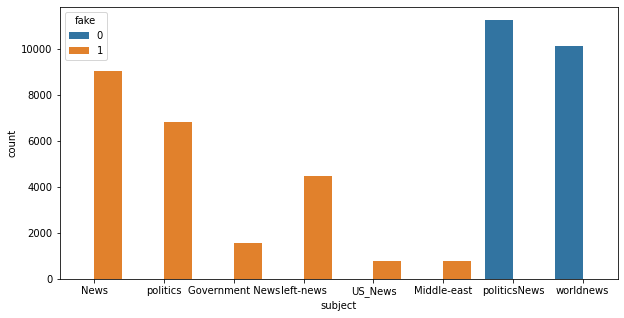

In [11]:
# Explore la columna subject
plt.figure(figsize=(10,5))
sns.countplot(x='subject', data=df_news, hue='fake')



In [12]:
df_news['date'] = pd.to_datetime(df_news['date'], errors='coerce') # If 'coerce', then invalid parsing will be set as NaT.
df_news['Year'] = df_news['date'].dt.year
df_news['Month'] = df_news['date'].dt.month

df_news.head()

,title,text,subject,date,fake,Year,Month
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,2017-12-31,1,2017.0,12.0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,2017-12-31,1,2017.0,12.0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,2017-12-30,1,2017.0,12.0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,2017-12-29,1,2017.0,12.0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,2017-12-25,1,2017.0,12.0


In [13]:
# combina columna title, text y elimina title
df_news['text'] = df_news['title'] + df_news['text']
df_news.drop(labels=['title'], axis=1, inplace=True)

df_news.sample(5)

,text,subject,date,fake,Year,Month
20997,South Korea's Moon welcomes talks with North K...,worldnews,2017-09-05,0,2017.0,9.0
12365,RAPPER KANYE WEST Reveals His Choice For Presi...,politics,2016-11-18,1,2016.0,11.0
13713,THIS ONE IS SPOT ON! The Democrat Party In a N...,politics,2016-06-11,1,2016.0,6.0
19991,TAKE THEM OFF OR PAY HUGE FINE! #NFL Won’t All...,left-news,2016-09-11,1,2016.0,9.0
3171,Ivanka Drops SHOCKING Bombshell On The Obamas...,News,2017-01-03,1,2017.0,1.0


In [14]:
# Eliminar todos los atributos excepto "texto"
df_news.drop(labels=['subject','date', 'Year','Month'], axis=1, inplace=True)
df_news.head()

,text,fake
0,Donald Trump Sends Out Embarrassing New Year’...,1
1,Drunk Bragging Trump Staffer Started Russian ...,1
2,Sheriff David Clarke Becomes An Internet Joke...,1
3,Trump Is So Obsessed He Even Has Obama’s Name...,1
4,Pope Francis Just Called Out Donald Trump Dur...,1


Splitting the dataset into training and test dataset

In [15]:
# Reorganización aleatoria de Dataframe
df_news = df_news.sample(frac=1) # frac=1 devuelve todas las filas (aleatorias)
df_news.head()

,text,fake
14301,Putin to inform Saudi king about his meeting w...,0
17745,Suicide bombers attack Damascus police center:...,0
12675,DEMOCRAT OPERATIVES Caught Planning To Bully W...,1
12064,Macron sees February end to fight against Isla...,0
6724,Exclusive: Top U.S. spy agency has not embrace...,0


In [16]:
# Split dataset into training and testing
from sklearn.model_selection import train_test_split

train_sentences, val_sentences, train_labels, val_labels=train_test_split(
    df_news['text'].to_numpy(),
    df_news['fake'].to_numpy(),
    test_size=0.2,
    random_state=42)

In [17]:
# Tokenization = splitting a stream of language into individual tokens. 
# Vectorization = converting string data into a numerical representation
# finding average number of tokens (words) in the training tweets

round(sum([len(i.split()) for i in train_sentences])/len(train_sentences))

416

In [18]:
max_vocab_length = 10000
max_length = 418

from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

text_vectorizer = TextVectorization(max_tokens=max_vocab_length,
                                    output_mode='int',
                                    output_sequence_length=max_length)

In [19]:
# Ajusta el vectorizador al texto de entrenamiento
text_vectorizer.adapt(train_sentences)

In [20]:
sample_sentence_vectorizer = "Just checking the text vectorizer"
text_vectorizer([sample_sentence_vectorizer])

<tf.Tensor: shape=(1, 418), dtype=int64, numpy=
array([[  77, 7851,    2, 2923,    1,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,   

In [21]:
# Prueba

import random

random_sentence = random.choice(train_sentences)

print(f"Original text;\n{random_sentence}\\n\n\nVectorized Version:{text_vectorizer([random_sentence])}")

Original text;
House approves $622 million to combat Zika virusWASHINGTON (Reuters) - The U.S. House of Representatives passed a bill on Wednesday to provide $622.1 million to control the spread of the Zika virus, far below President Barack Obama’s request and lower than Senate legislation. The bill passed the Republican-controlled House 241 to 184, largely along party lines, and sets up a confrontation with both the Republican-majority Senate and the Democratic Obama administration.  The White House has threatened to veto the House bill, saying it was “woefully inadequate.” The Obama administration has requested $1.9 billion. On Tuesday, the Senate cleared the way for expected approval by the chamber on Thursday of $1.1 billion to fight the mosquito-borne Zika virus, which has been linked to birth defects. Unlike the Senate legislation, the House bill requires that the $622.1 million be fully offset with spending cuts elsewhere. Many conservative Republicans in the House refuse to app


Creating an Embedding using an Embedding Layer (keras)

In [22]:
from tensorflow.keras import layers

embedding = layers.Embedding(input_dim=max_vocab_length,
                             output_dim=128,
                             embeddings_initializer='uniform',
                             input_length=max_length)


In [23]:
# Le paso una oracion aleatoria 
new_random_sentence = random.choice(train_sentences)
print(f"Original text:\n{random_sentence}\n\nEmbedd version: {embedding(text_vectorizer([random_sentence]))}")

Original text:
House approves $622 million to combat Zika virusWASHINGTON (Reuters) - The U.S. House of Representatives passed a bill on Wednesday to provide $622.1 million to control the spread of the Zika virus, far below President Barack Obama’s request and lower than Senate legislation. The bill passed the Republican-controlled House 241 to 184, largely along party lines, and sets up a confrontation with both the Republican-majority Senate and the Democratic Obama administration.  The White House has threatened to veto the House bill, saying it was “woefully inadequate.” The Obama administration has requested $1.9 billion. On Tuesday, the Senate cleared the way for expected approval by the chamber on Thursday of $1.1 billion to fight the mosquito-borne Zika virus, which has been linked to birth defects. Unlike the Senate legislation, the House bill requires that the $622.1 million be fully offset with spending cuts elsewhere. Many conservative Republicans in the House refuse to app

Modelling

In [24]:
# Model with LSTM(long-short term memory) neural network.

# Create an LSTM model
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype='string')

# convert text into numbers
x = text_vectorizer(inputs) 

# Convert text_vectorizer layer into embedding layer
x = embedding(x)

# Model 
x = layers.LSTM(64)(x)

# output
outputs = layers.Dense(1, activation='sigmoid')(x)

# inputs and outputs model
model = tf.keras.Model(inputs, outputs, name='model_LSTM')

In [25]:
model.summary()

Model: "model_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 418)              0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 418, 128)          1280000   
                                                                 
 lstm (LSTM)                 (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 1,329,473
Trainable params: 1,329,473
Non-trainable params: 0
______________________________________________

In [26]:
# Compilo el modelo
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [27]:
# Fit the model
model_history = model.fit(train_sentences,
                          train_labels,
                          epochs=5,
                          validation_data=(val_sentences, val_labels))

Epoch 1/5
1123/1123 [==============================] - 486s 431ms/step - loss: 0.3689 - accuracy: 0.8354 - val_loss: 0.1638 - val_accuracy: 0.9514
Epoch 2/5
1123/1123 [==============================] - 449s 399ms/step - loss: 0.3651 - accuracy: 0.8570 - val_loss: 0.2913 - val_accuracy: 0.8983
Epoch 3/5
1123/1123 [==============================] - 411s 366ms/step - loss: 0.3124 - accuracy: 0.8779 - val_loss: 0.2071 - val_accuracy: 0.9460
Epoch 4/5
1123/1123 [==============================] - 393s 350ms/step - loss: 0.2176 - accuracy: 0.9350 - val_loss: 0.2367 - val_accuracy: 0.9206
Epoch 5/5
1123/1123 [==============================] - 397s 354ms/step - loss: 0.2717 - accuracy: 0.8944 - val_loss: 0.1666 - val_accuracy: 0.9614


In [32]:
# Prediccion
model_prediction = model.predict(val_sentences)
model_prediction[:10]

# Convertir la predicción a etiquetas
model_preds = tf.squeeze(tf.round(model_prediction))
model_preds[:10]

# Measure Score
from sklearn.metrics import accuracy_score

print(f"Accuracy Score: {accuracy_score(val_labels,model_preds)}")

281/281 [==============================] - 23s 82ms/step
Accuracy Score: 0.961358574610245
